In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Create your connection.
cnx = sqlite3.connect('Q:\\football_project\\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
pd.set_option("display.max_columns",None)
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [5]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [6]:
df.dropna()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
df.drop(columns=['id','player_fifa_api_id','player_api_id','date'],axis=1,inplace=True)

'b'       boolean
'i'       (signed) integer
'u'       unsigned integer
'f'       floating-point
'c'       complex-floating point
'O'       (Python) objects
'S', 'a'  (byte-)string
'U'       Unicode
'V'       raw data (void)

In [52]:
num_features=[features for features in df.columns if df[features].dtype=='float64']
len(num_features)

35

In [10]:
cat_features=[features for features in  df.columns if df[features].dtype=="object"]
cat_features

['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# filling NaN Values

In [11]:
for i in num_features:
    df[i]=df[i].fillna(df[i].median())

In [12]:
for i in cat_features:
    df[i]=df[i].fillna(method='ffill')

In [13]:
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

# Handling outliers

In [14]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000
mean,68.601833,73.462805,55.104665,49.935068,57.278446,62.441352,49.505767,59.197078,53.010420,49.383763,57.078651,63.405288,67.665449,68.055556,66.000832,66.107779,65.216194,61.822930,66.984248,67.047457,67.431687,53.360608,60.961914,52.031949,55.805651,57.904907,55.013056,46.786909,50.376926,48.075172,14.683016,16.040603,20.957473,16.108834,16.416713
std,7.025175,6.577376,17.204929,18.996528,16.452427,14.162837,18.124078,17.707299,18.124376,17.791235,14.362308,15.164049,12.954108,12.541292,12.861039,9.134782,12.968349,16.099873,10.925985,13.135979,12.045286,18.327928,16.054236,19.408794,18.408511,15.034196,15.511737,21.180495,21.438205,21.447399,16.830079,15.834952,21.412737,16.066264,17.162938
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,76.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


<AxesSubplot:>

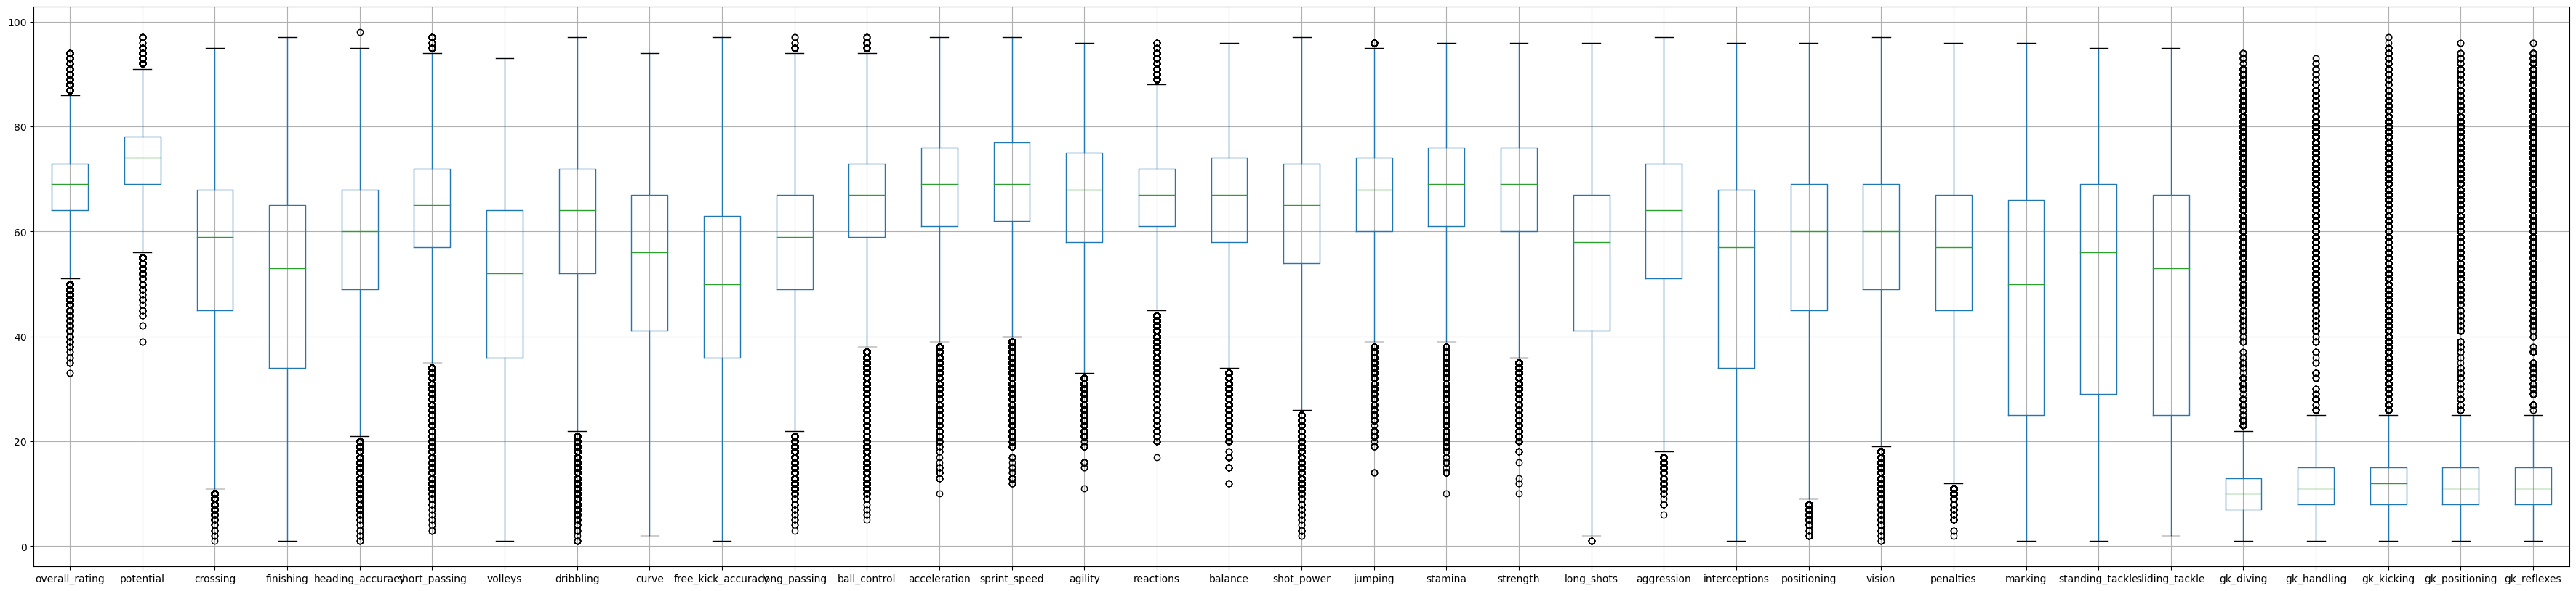

In [15]:
plt.figure(figsize=(45,10))
df.boxplot(num_features)

from scipy.stats import zscore
z_score=zscore(new_df[num_features])
abs_score=np.abs(z_score)
condition=(abs_score<4).all(axis=1)
new_df=new_df[condition]
new_df.describe()

In [16]:
Q3=df[num_features].quantile(0.75)
Q1=df[num_features].quantile(0.25)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR

condition=((df[num_features]>ll) & (df[num_features]<ul)).all(axis=1)
new_df=df[condition]
new_df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000,126872.000000
mean,69.192154,73.664315,59.563016,53.699934,60.740754,66.542027,52.892364,64.448255,57.129997,52.834014,60.227599,68.016521,70.834715,71.164221,68.778911,67.161533,67.293839,66.258457,68.178321,70.485064,68.309123,57.845041,63.782442,53.176516,59.070520,60.352907,57.161399,49.153391,53.345782,50.694684,10.074768,10.107849,10.133993,10.077086,10.038133
std,6.248767,6.085163,12.997462,16.390889,11.561811,8.756749,15.424948,11.851573,14.773654,15.182639,11.454208,8.756463,9.917647,9.513811,10.676702,8.002866,10.863103,11.695949,9.946694,9.657615,10.715365,14.730391,13.866070,18.664553,14.911544,12.273992,12.994723,20.120232,20.009255,20.312431,3.170431,3.169842,3.191151,3.192729,3.185593
min,51.000000,56.000000,11.000000,7.000000,21.000000,35.000000,6.000000,23.000000,10.000000,10.000000,23.000000,39.000000,39.000000,40.000000,33.000000,45.000000,35.000000,26.000000,40.000000,39.000000,37.000000,6.000000,19.000000,10.000000,10.000000,20.000000,13.000000,8.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,69.000000,52.000000,41.000000,53.000000,61.000000,42.000000,58.000000,47.000000,41.000000,53.000000,63.000000,65.000000,66.000000,62.000000,62.000000,60.000000,60.000000,62.000000,64.000000,61.000000,49.000000,55.000000,37.000000,51.000000,53.000000,48.000000,28.000000,34.000000,30.000000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,69.000000,74.000000,61.000000,57.000000,61.000000,67.000000,55.000000,66.000000,59.000000,53.000000,61.000000,68.000000,71.000000,72.000000,70.000000,68.000000,68.000000,68.000000,69.000000,71.000000,69.000000,60.000000,66.000000,58.000000,62.000000,61.000000,58.000000,54.000000,60.000000,56.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,74.000000,78.000000,69.000000,66.000000,69.000000,73.000000,65.000000,73.000000,68.000000,65.000000,68.000000,74.000000,78.000000,78.000000,76.000000,73.000000,75.000000,74.000000,75.000000,77.000000,76.000000,68.000000,74.000000,69.000000,70.000000,69.000000,67.000000,66.000000,70.000000,68.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,86.000000,91.000000,92.000000,93.000000,95.000000,94.000000,92.000000,94.000000,94.000000,97.000000,93.000000,93.000000,97.000000,97.000000,96.000000,88.000000,95.000000,96.000000,94.000000,96.000000,95.000000,93.000000,96.000000,94.000000,93.000000,93.000000,96.000000,92.000000,94.000000,94.000000,20.000000,24.000000,25.000000,24.000000,24.000000


<AxesSubplot:>

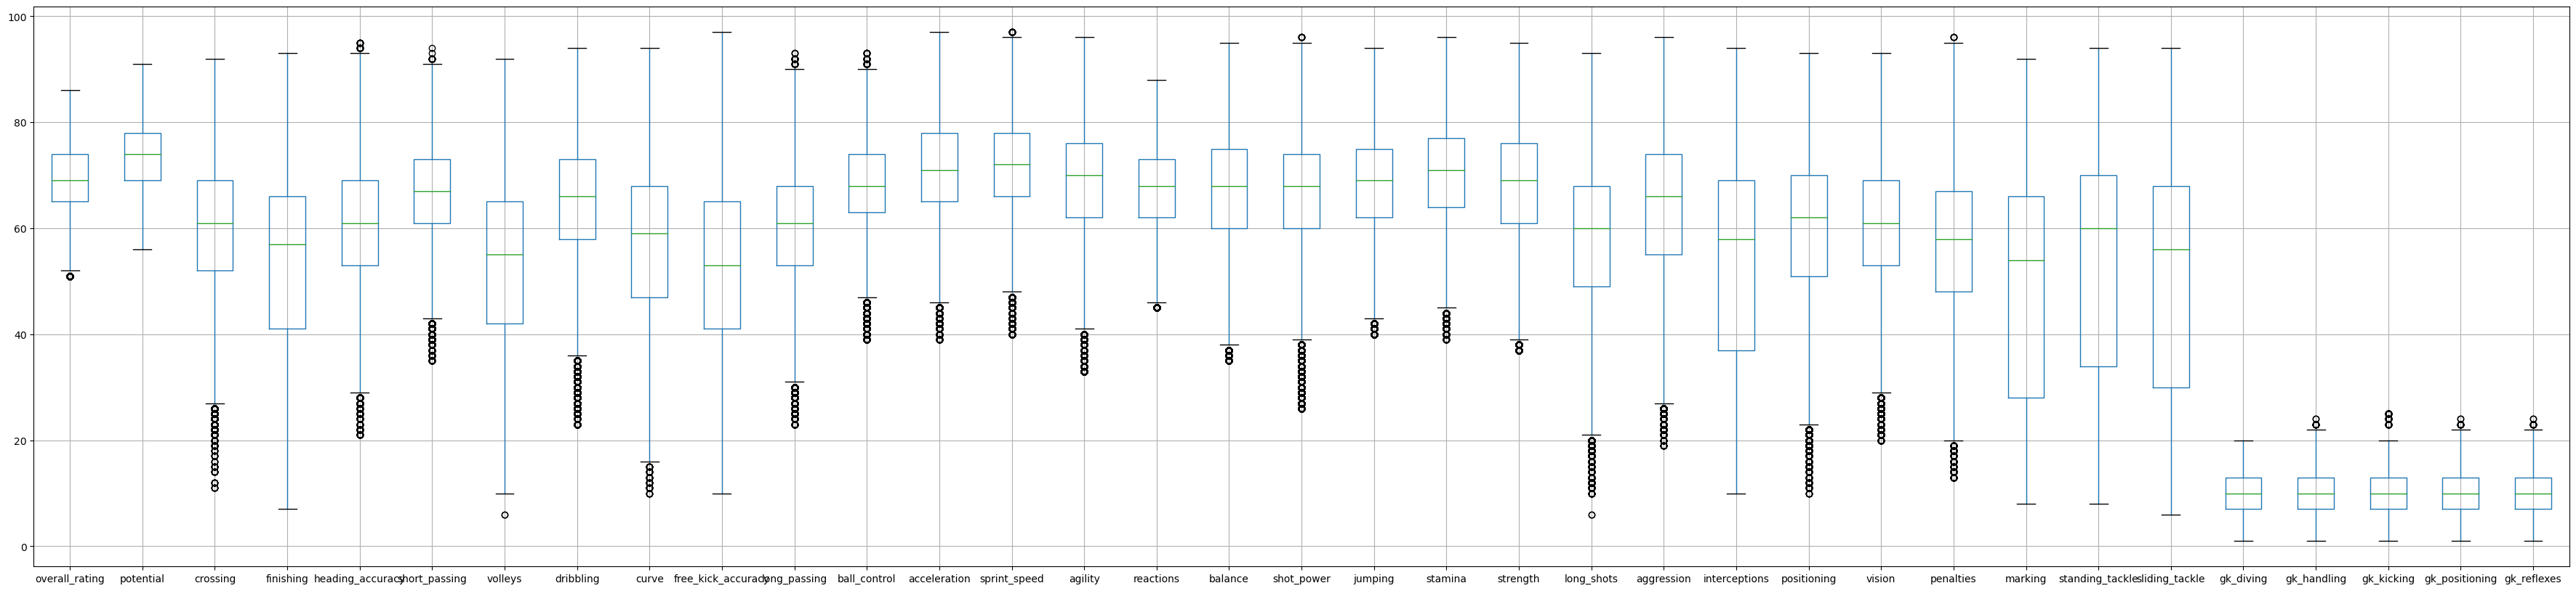

In [17]:
plt.figure(figsize=(45,10))
new_df.boxplot()

In [18]:
new_df

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183968,78.0,78.0,right,medium,low,77.0,70.0,59.0,80.0,77.0,78.0,84.0,78.0,81.0,80.0,59.0,63.0,81.0,70.0,70.0,76.0,58.0,50.0,62.0,79.0,51.0,32.0,74.0,82.0,78.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183969,81.0,81.0,right,medium,low,80.0,72.0,59.0,86.0,77.0,80.0,86.0,78.0,81.0,82.0,59.0,63.0,81.0,74.0,70.0,78.0,58.0,50.0,62.0,81.0,51.0,32.0,77.0,87.0,78.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183970,81.0,81.0,right,medium,low,80.0,72.0,59.0,86.0,77.0,80.0,86.0,78.0,81.0,82.0,60.0,63.0,81.0,74.0,70.0,78.0,58.0,50.0,62.0,81.0,51.0,32.0,77.0,87.0,78.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0
183971,81.0,85.0,right,medium,low,81.0,78.0,59.0,85.0,77.0,80.0,88.0,78.0,82.0,84.0,65.0,69.0,77.0,83.0,73.0,78.0,58.0,71.0,70.0,83.0,56.0,32.0,84.0,87.0,73.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0


In [19]:
new_df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [20]:
df.shape

(183978, 38)

In [21]:
new_df.shape 

(126872, 38)

In [22]:
((183978-57106)/183978)          # data loss

0.689604191805542

In [23]:
# Data Transformation

sb.PairGrid(new_df)

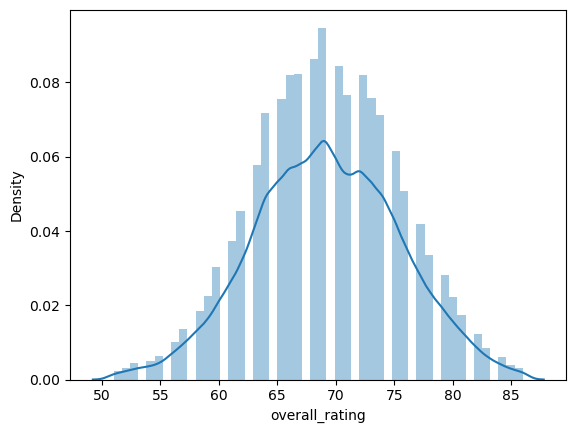

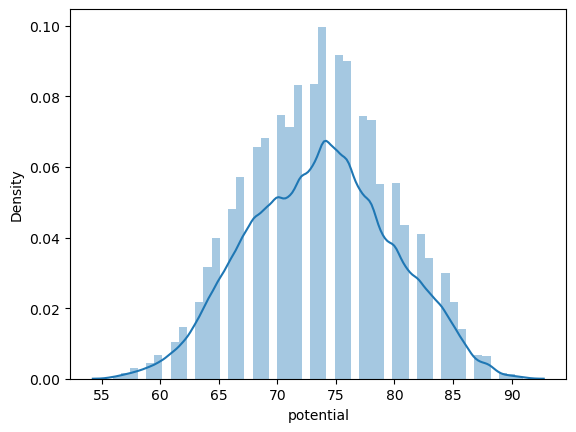

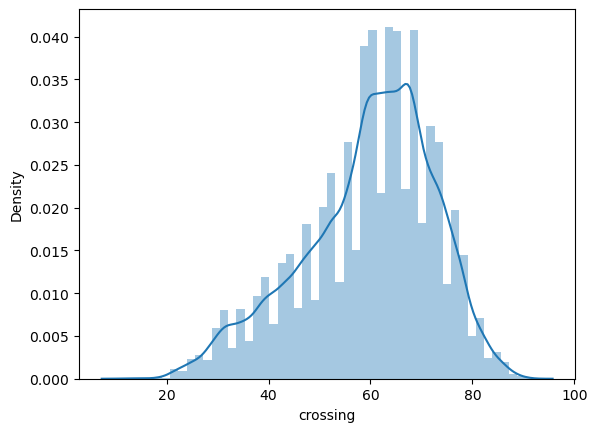

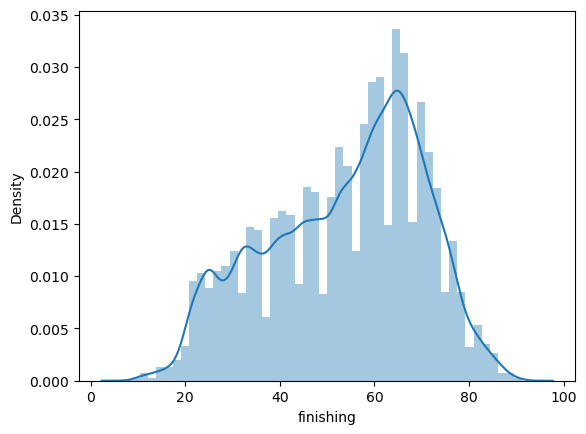

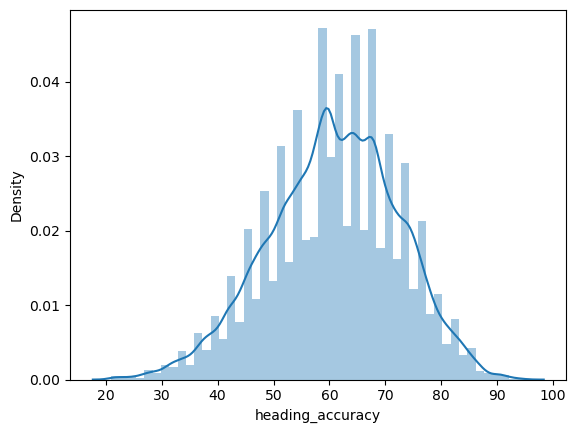

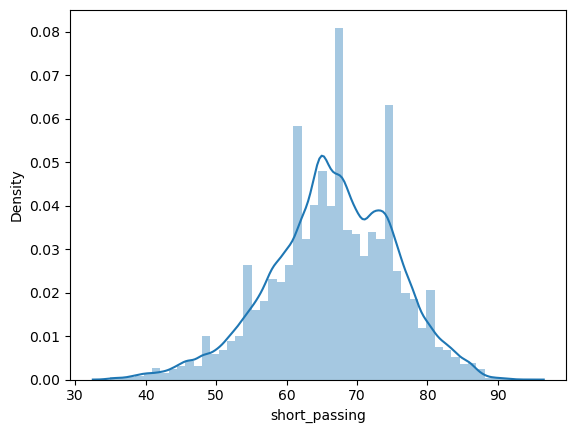

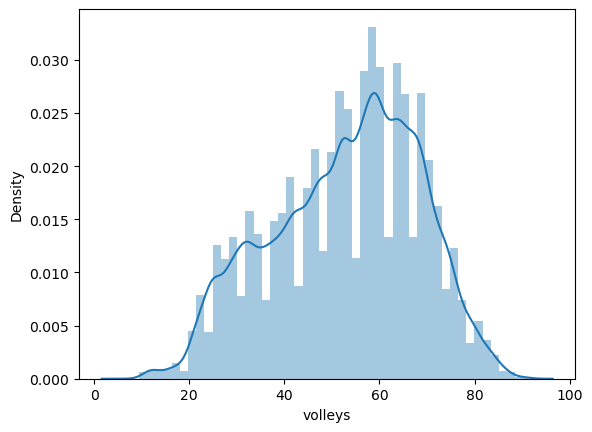

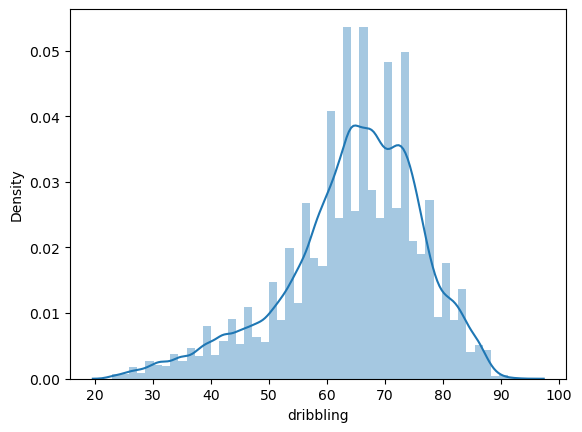

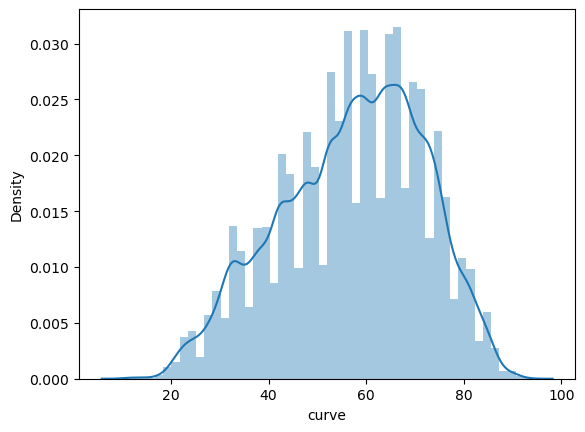

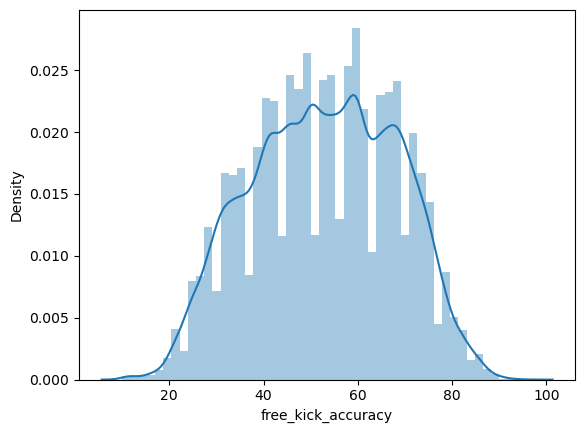

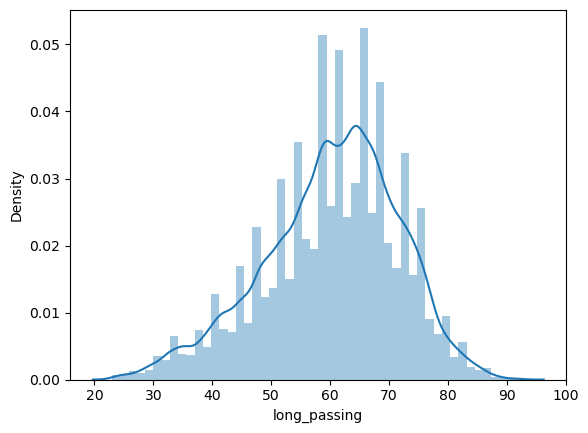

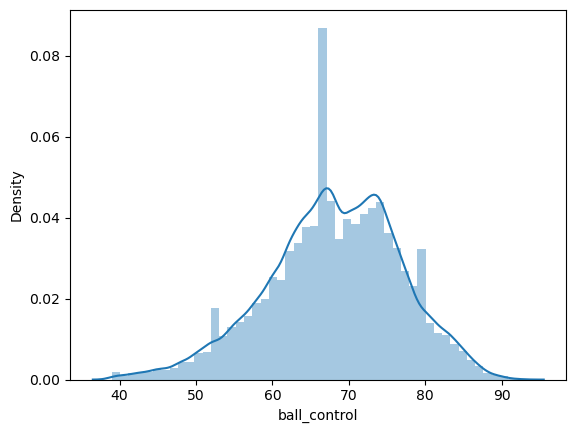

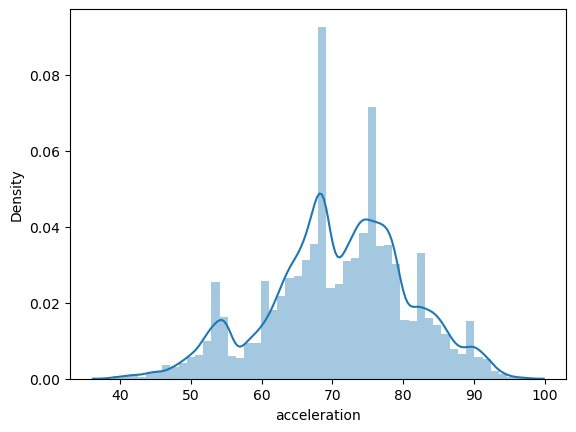

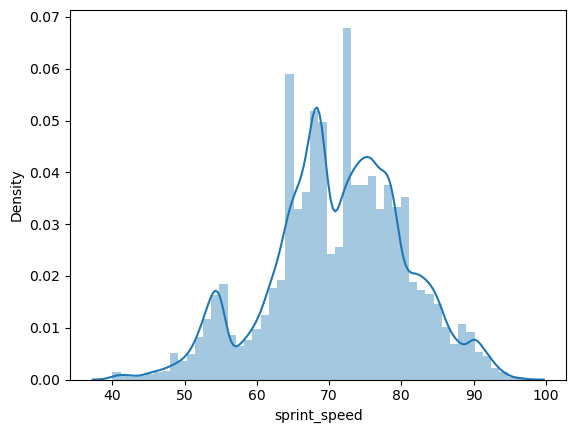

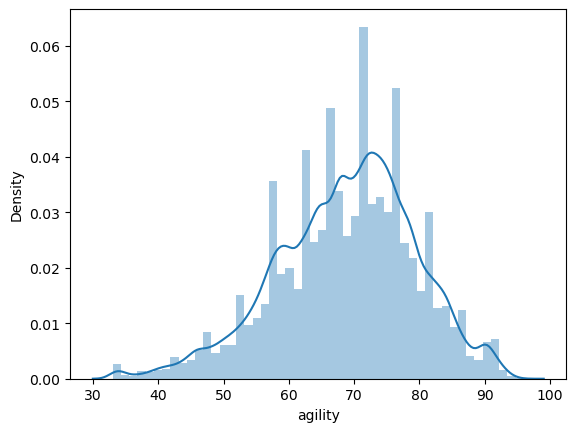

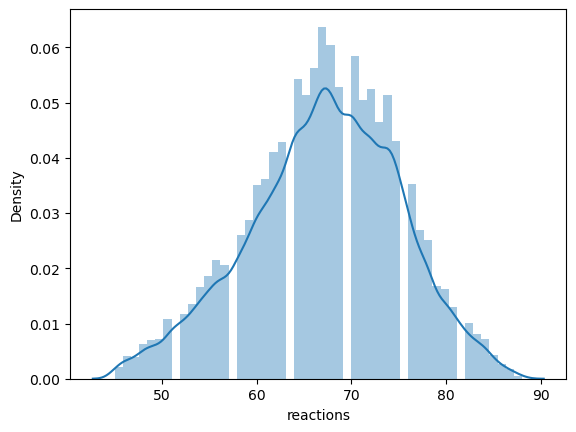

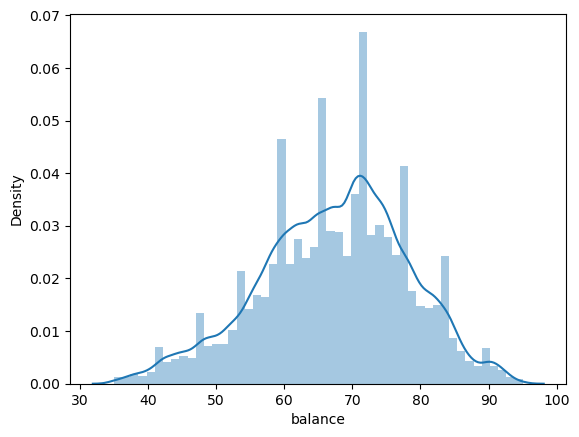

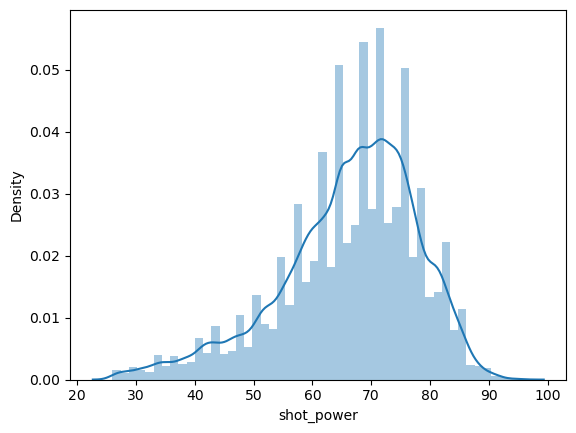

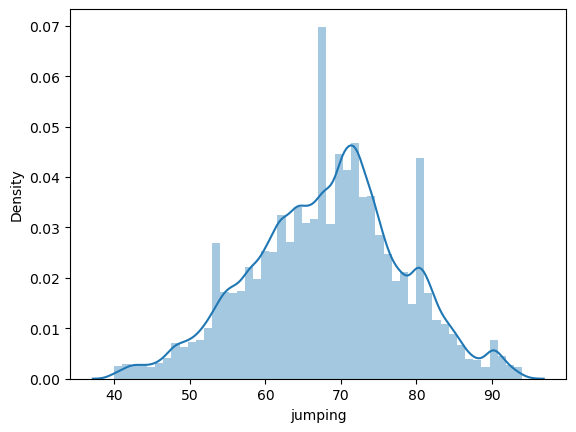

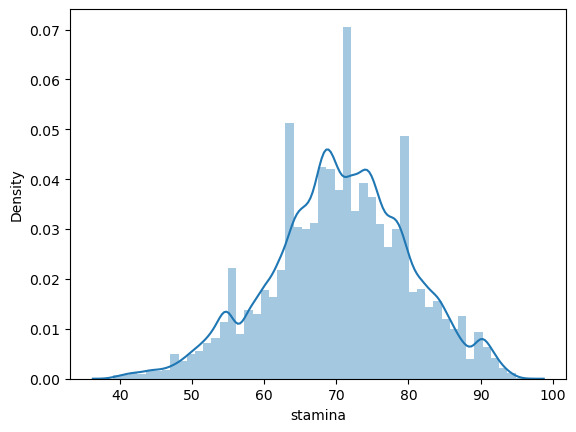

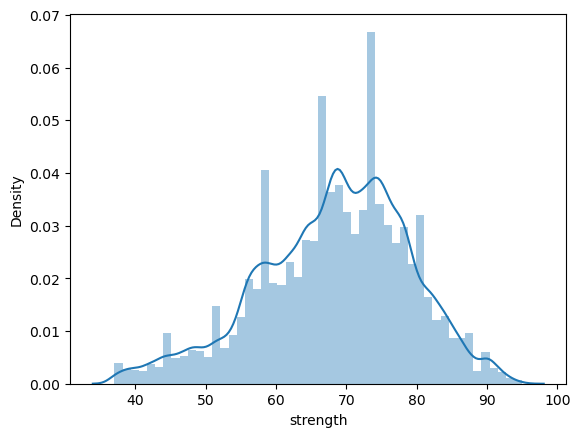

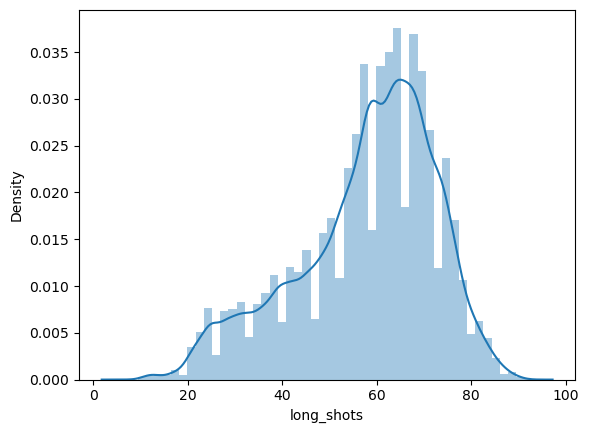

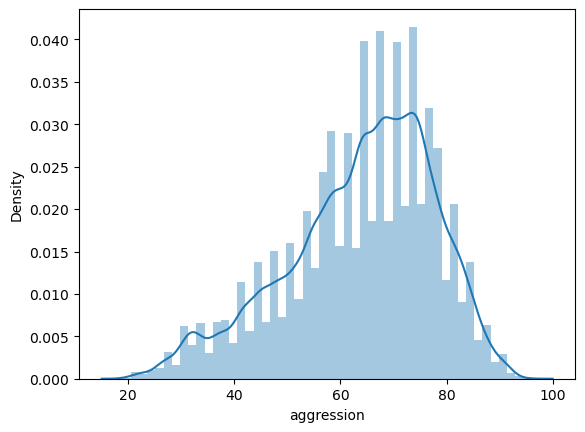

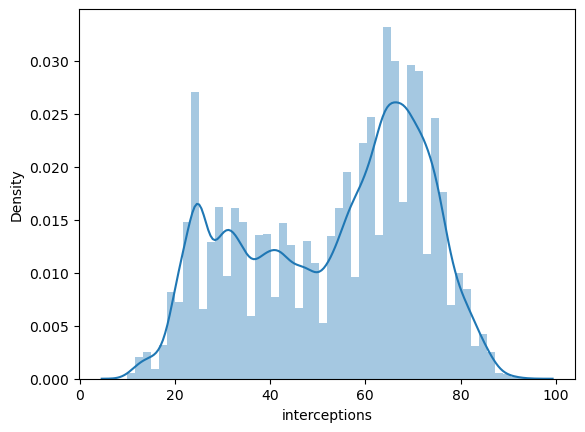

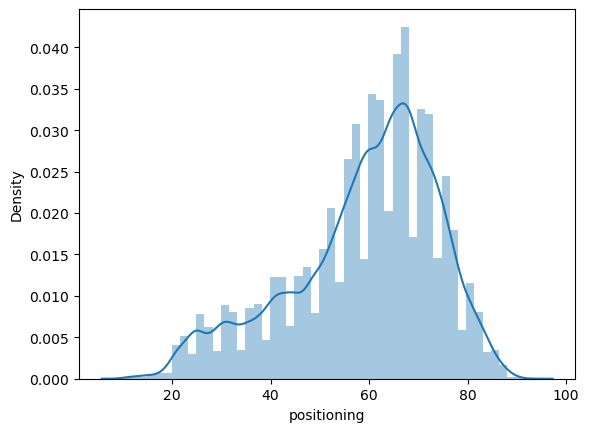

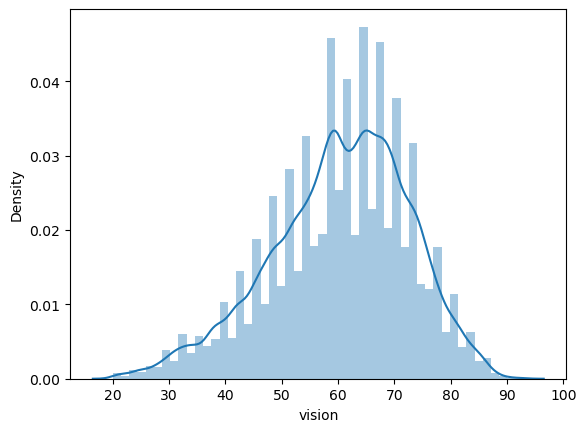

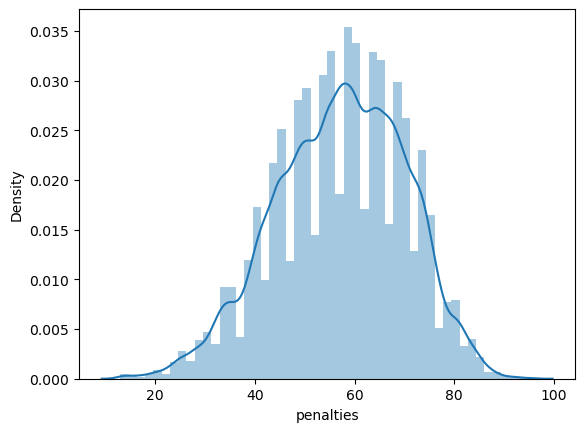

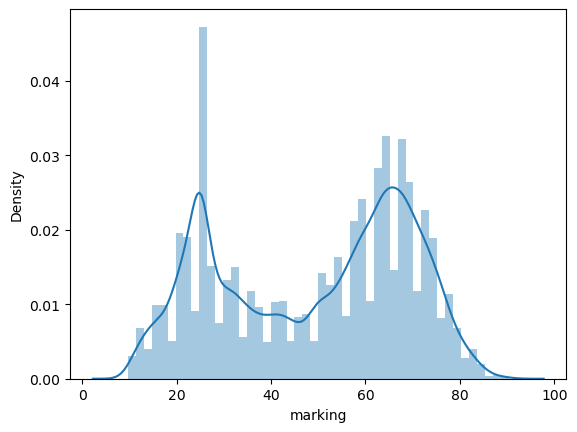

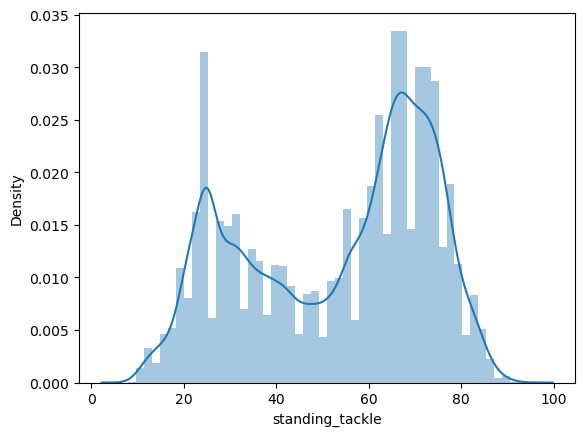

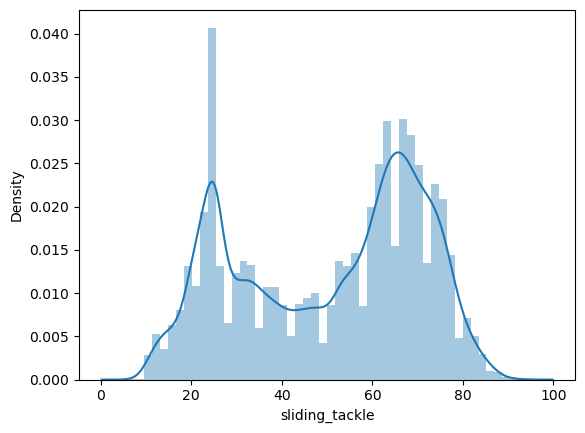

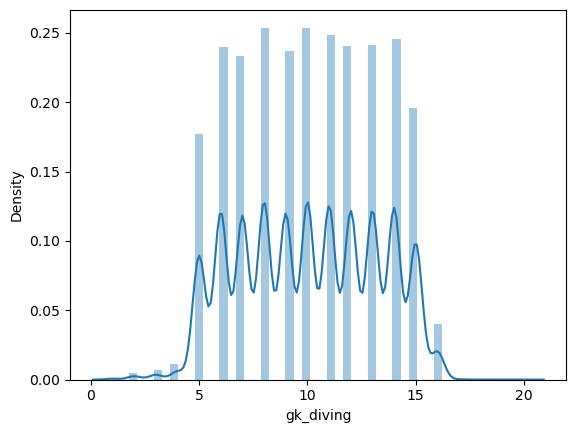

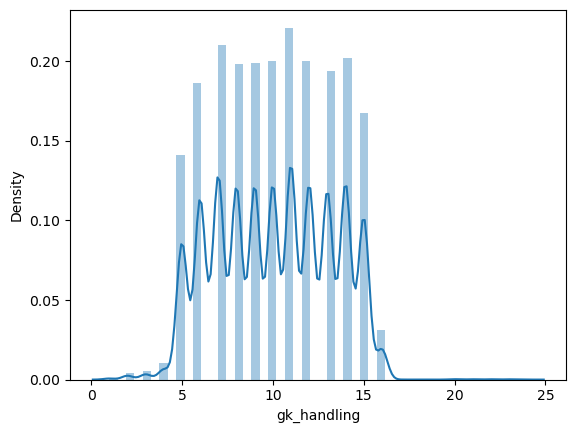

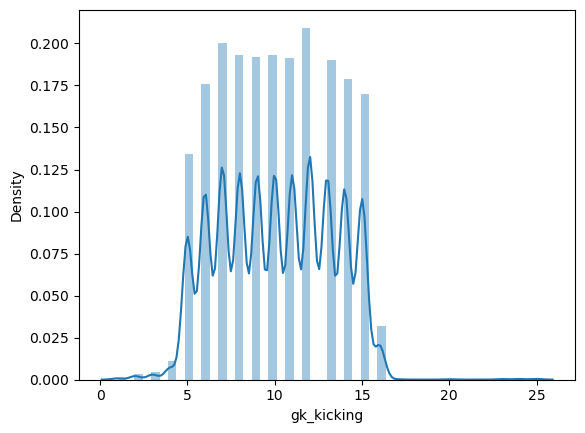

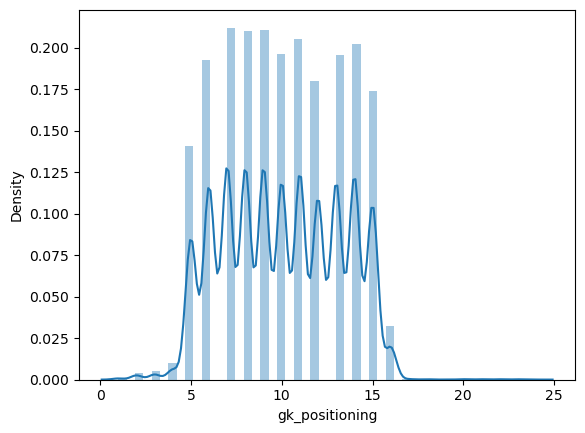

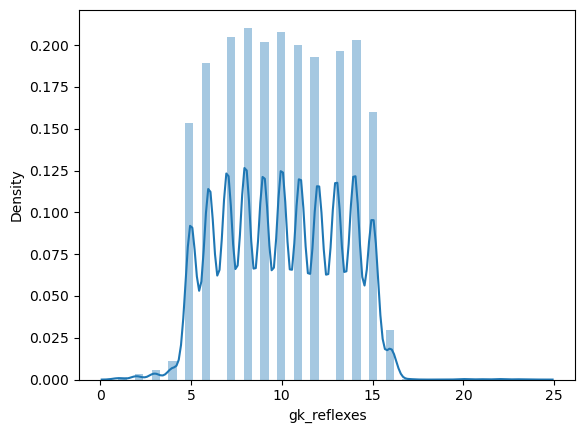

In [24]:
for i in num_features:
    sb.distplot(new_df[i])
    plt.xlabel(i)
    plt.show()

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
num_features = ['potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed',
                'agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle',
                'sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']
new_df[num_features] = scaler.fit_transform(new_df[num_features])


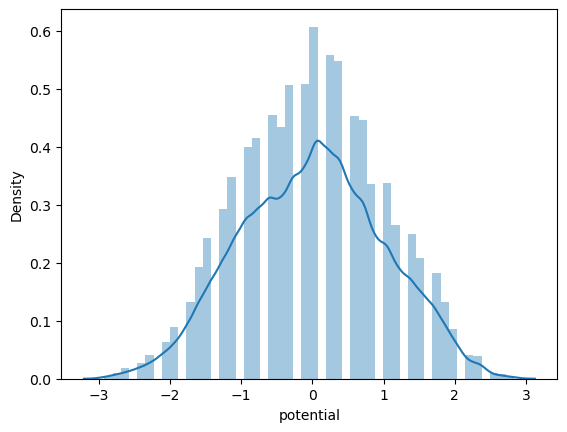

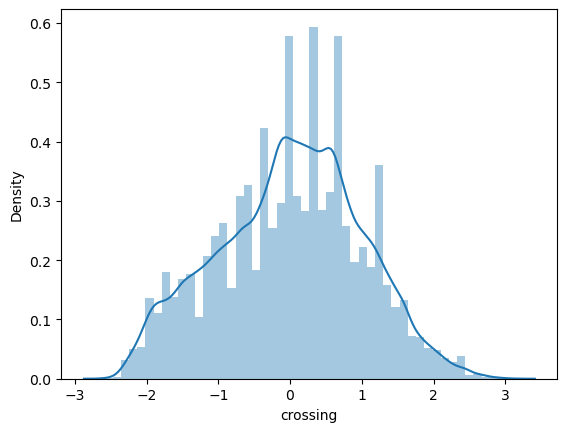

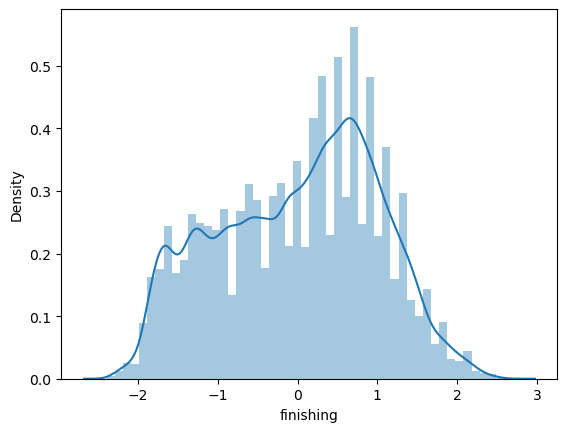

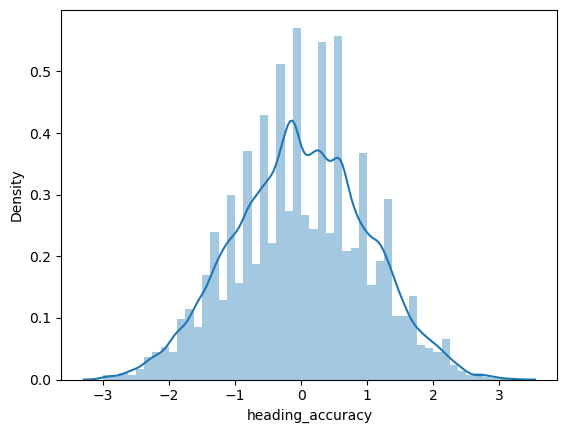

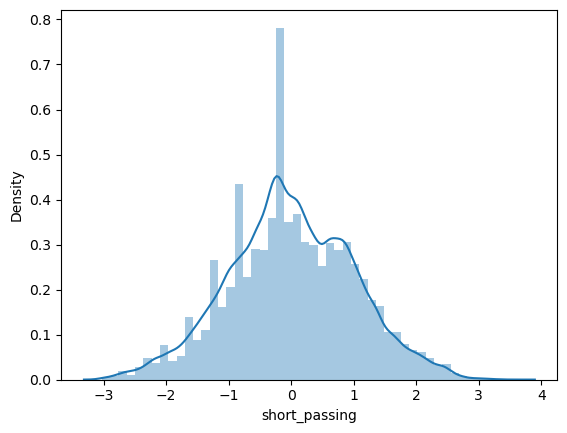

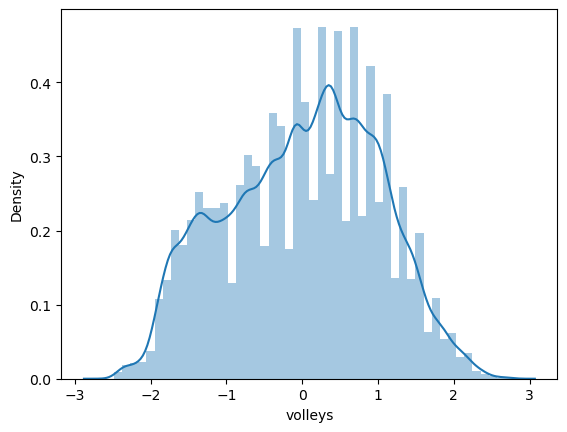

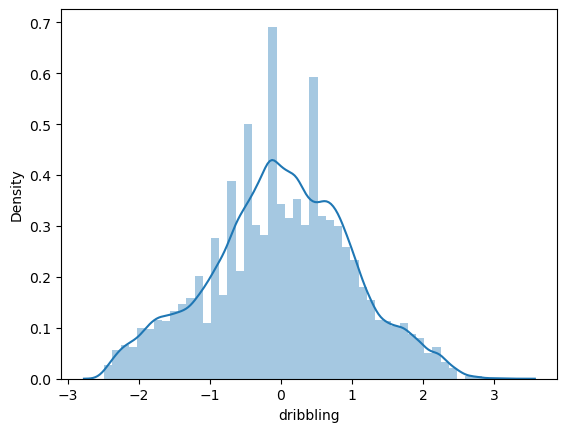

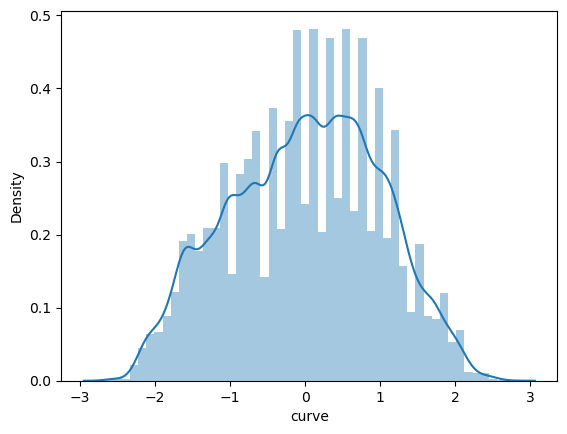

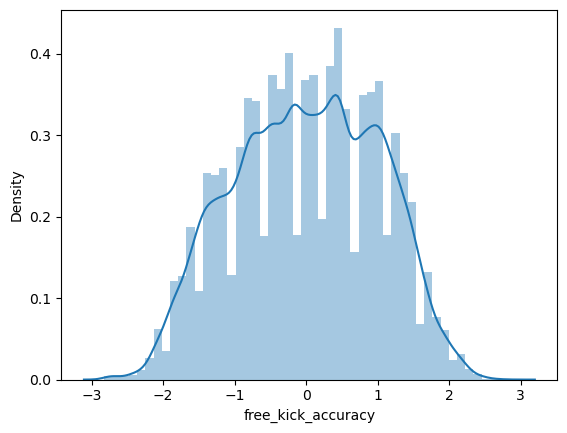

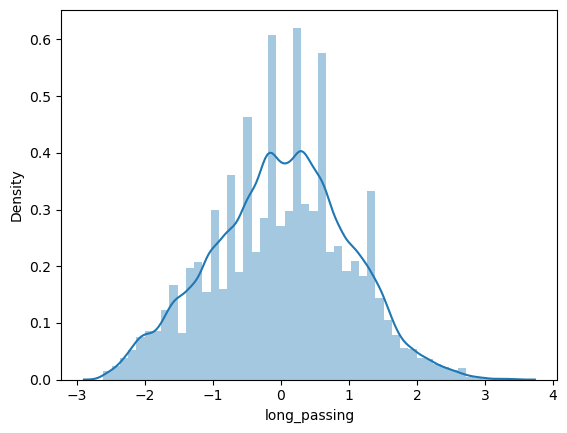

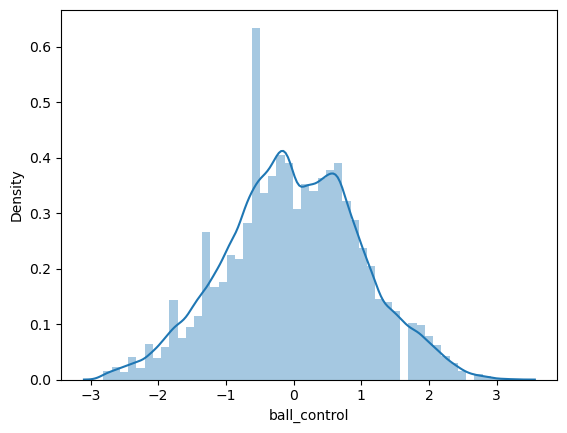

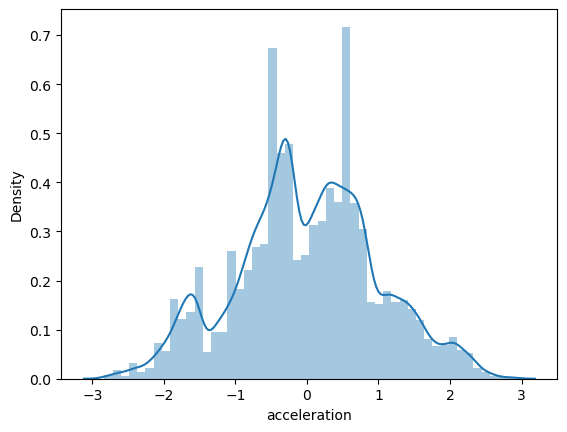

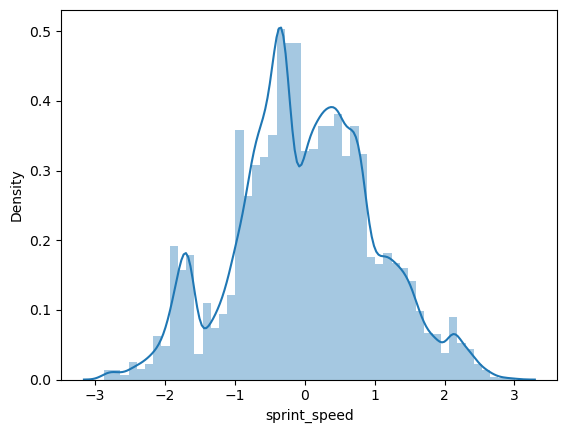

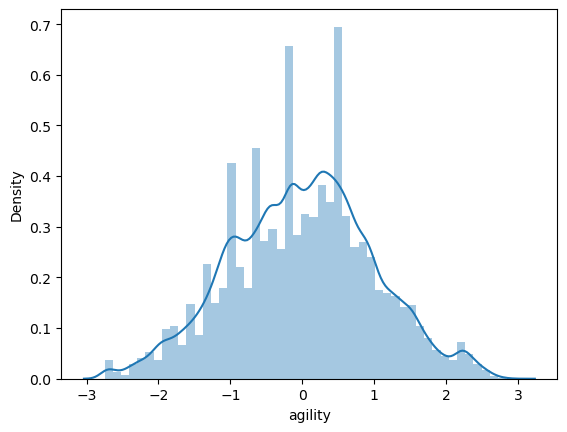

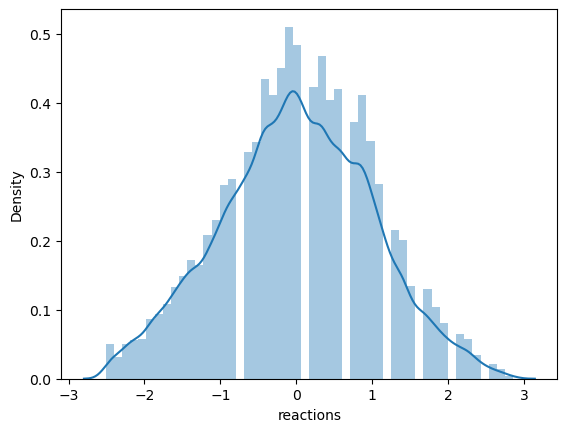

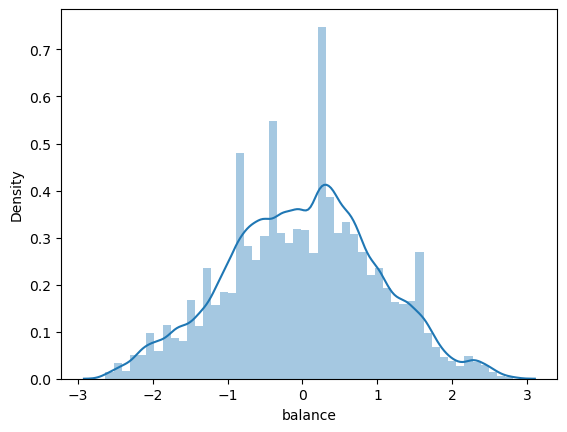

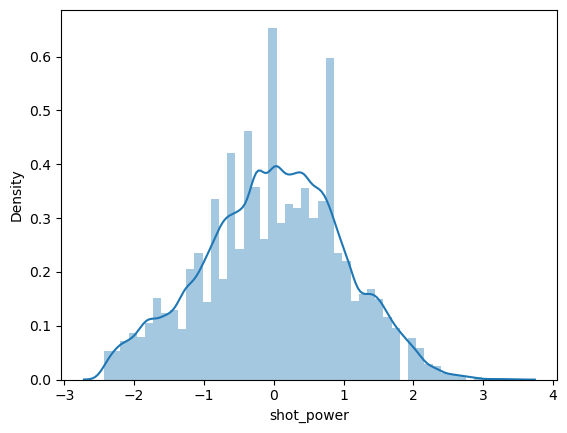

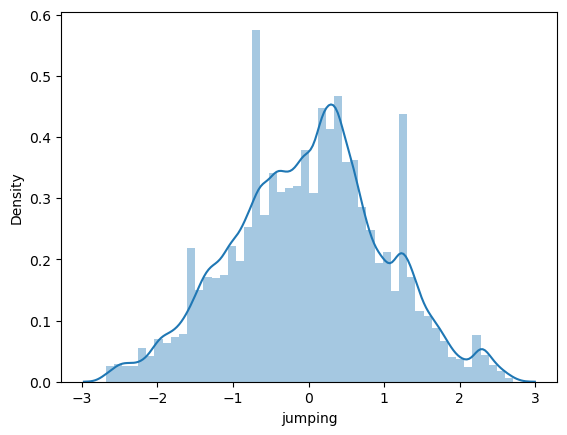

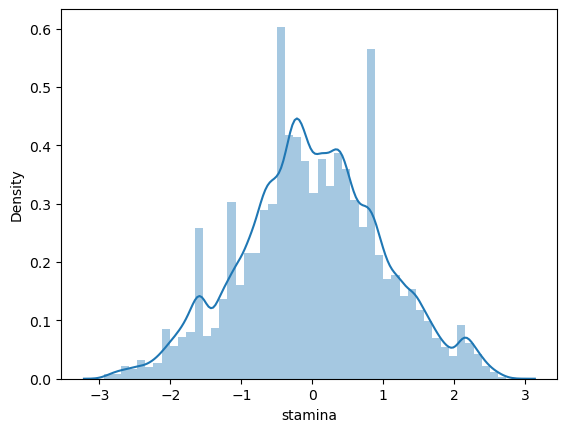

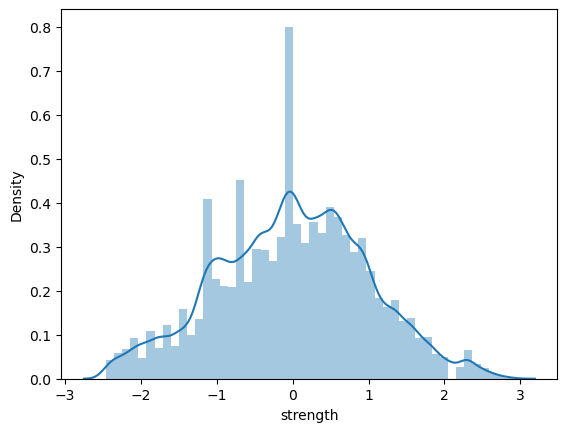

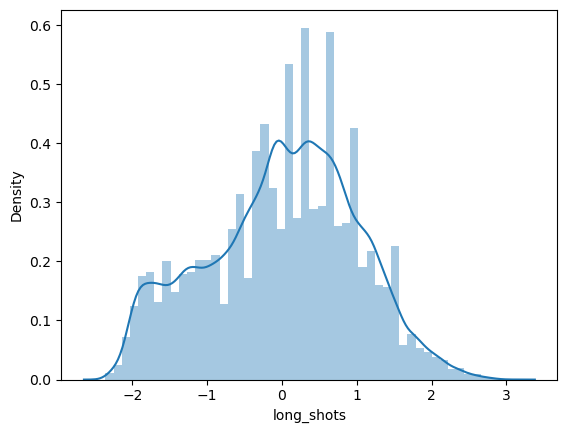

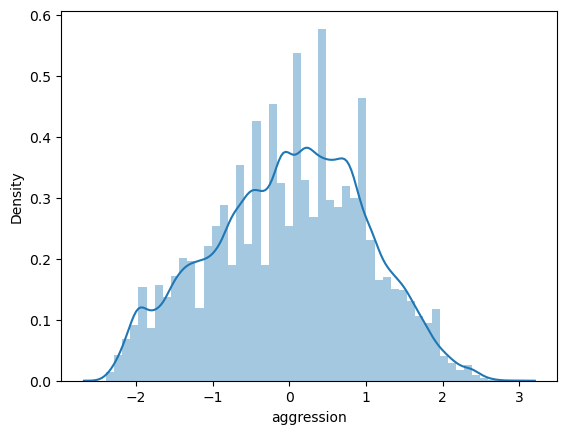

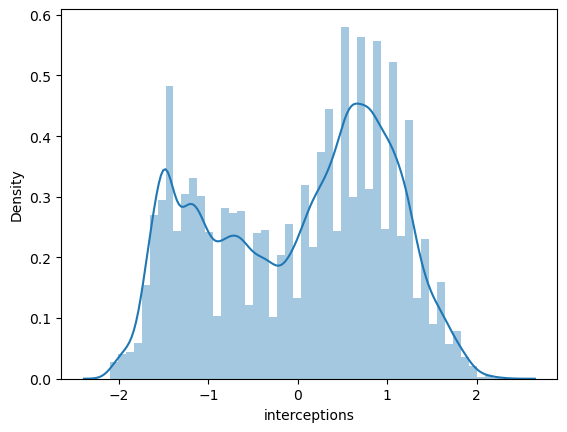

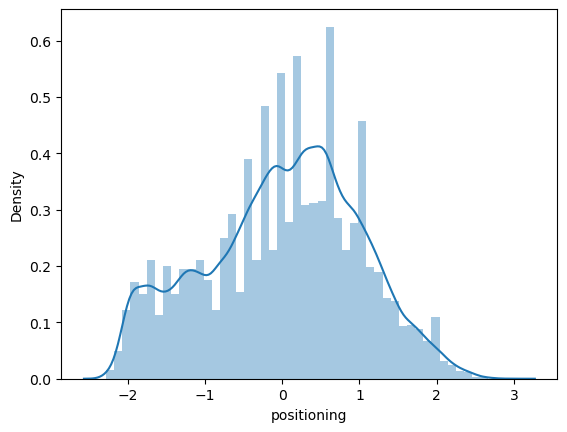

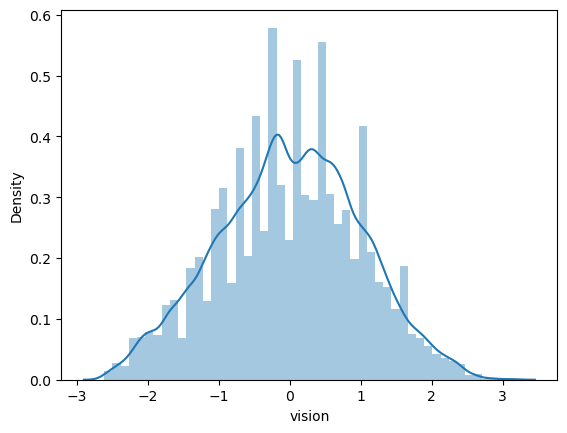

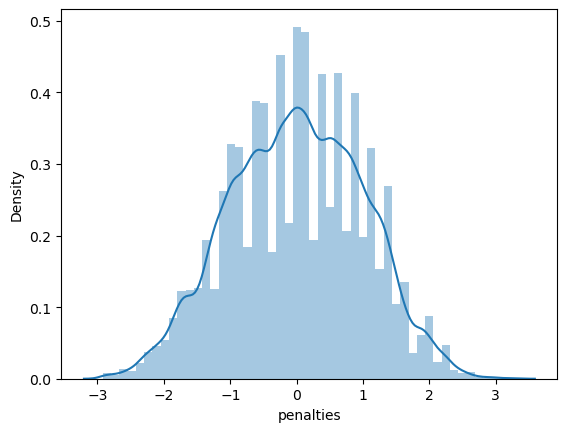

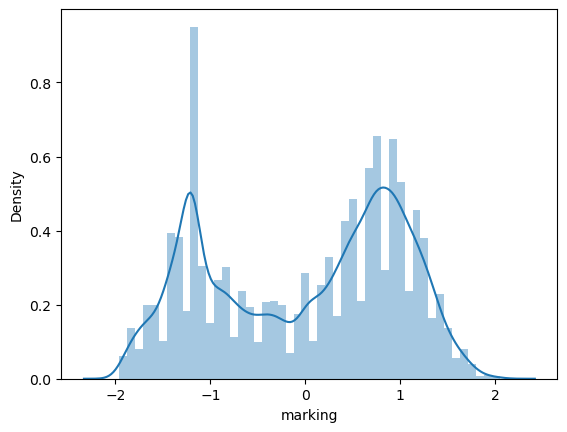

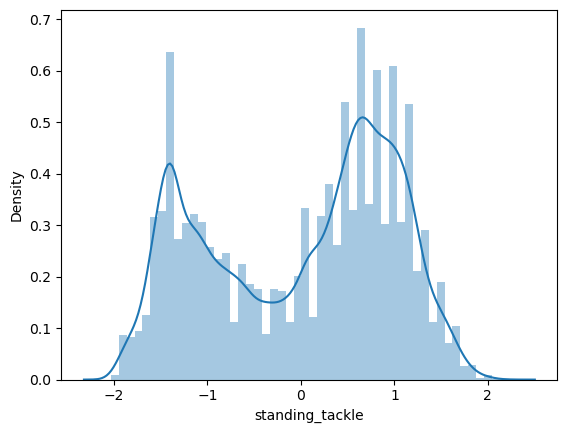

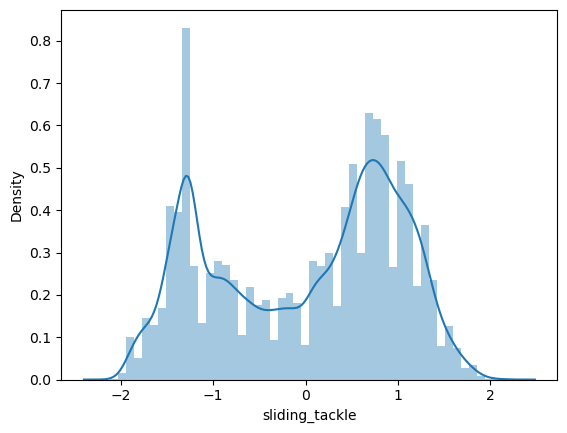

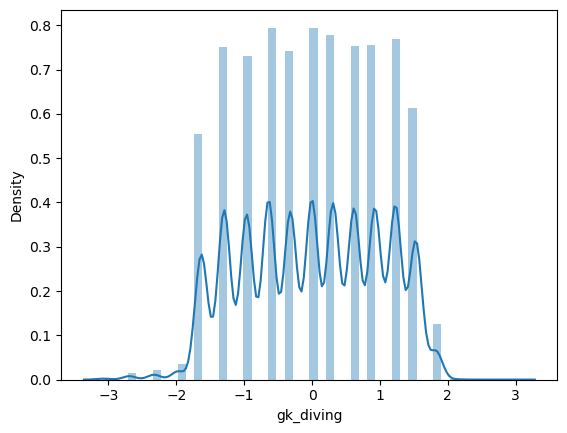

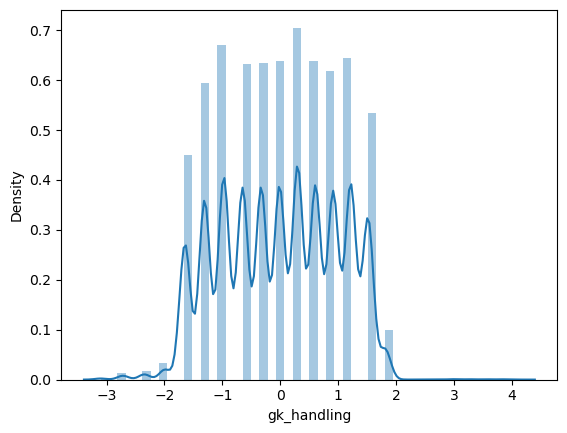

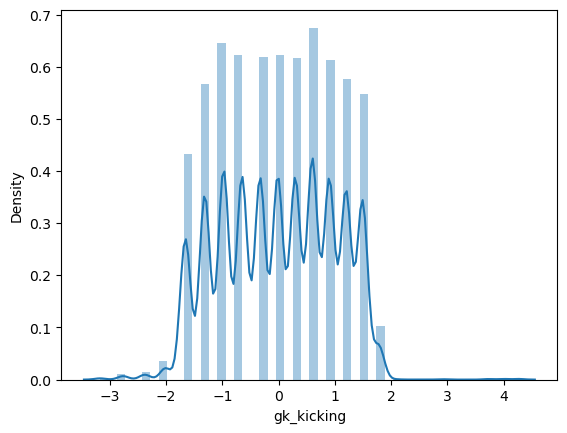

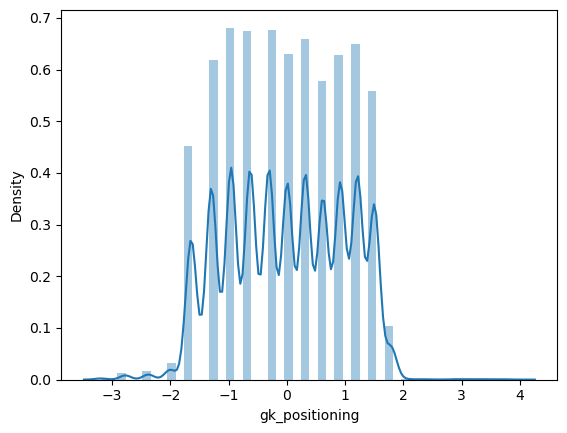

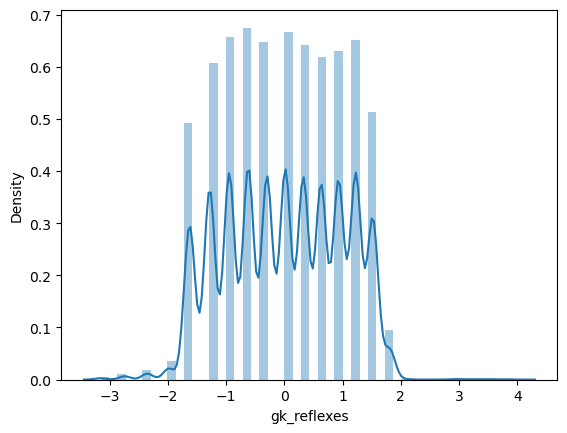

In [26]:
for i in num_features:
    sb.distplot(new_df[i])
    plt.xlabel(i)
    plt.show()

# Data EnCoding

In [27]:
cat_features

['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [28]:
new_df.preferred_foot.unique()

array(['right', 'left'], dtype=object)

In [29]:
new_df.attacking_work_rate.unique()

array(['medium', 'high', 'None', 'low', 'le', 'norm', 'y', 'stoc'],
      dtype=object)

In [30]:
new_df.defensive_work_rate.unique()

array(['medium', 'high', 'low', '_0', '5', 'ean', 'o', '1', 'ormal', '7',
       '8', '0', '2', '3', '6', '4', 'es', '9', 'tocky'], dtype=object)

In [31]:
new_df=pd.get_dummies(new_df,columns=cat_features,drop_first=True,dtype=float)

In [32]:
new_df.reset_index(inplace=True)

In [33]:
new_df.to_csv('final_football.csv')

In [34]:
new_df

,index,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y,defensive_work_rate_1,defensive_work_rate_2,defensive_work_rate_3,defensive_work_rate_4,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate_7,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,0,67.0,-0.436208,-0.887606,-0.646072,0.888188,-0.672294,-0.618461,-1.176202,-0.854714,-0.911227,0.274122,-2.001247,-1.095681,-0.780031,-0.947044,-2.315476,-0.257030,-1.040406,-1.025979,-1.652987,0.701918,-1.494477,0.471742,0.907966,-1.033722,-0.588372,-0.735272,0.787548,0.779618,0.903492,-1.295315,0.299063,-0.014651,-0.628488,-0.619007,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,67.0,-0.436208,-0.887606,-0.646072,0.888188,-0.672294,-0.618461,-1.176202,-0.854714,-0.911227,0.274122,-2.001247,-1.095681,-0.780031,-0.947044,-2.315476,-0.257030,-1.040406,-1.025979,-1.652987,0.701918,-1.494477,0.471742,0.907966,-1.033722,-0.588372,-0.735272,0.787548,0.779618,0.903492,-1.295315,0.299063,-0.014651,-0.628488,-0.619007,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,62.0,-1.260571,-0.887606,-0.646072,0.888188,-0.672294,-0.618461,-1.176202,-0.854714,-0.911227,0.274122,-2.001247,-1.095681,-0.780031,-0.947044,-2.315476,-0.257030,-1.040406,-1.025979,-1.652987,0.701918,-1.494477,-0.165789,-0.692436,-1.033722,-0.588372,-0.735272,0.787548,0.615548,0.903492,-1.295315,0.299063,-0.014651,-0.628488,-0.619007,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,61.0,-1.425788,-0.955376,-0.704243,0.795634,-0.780202,-0.680880,-1.243481,-0.917595,-0.977077,0.180585,-2.088994,-1.095681,-0.780031,-0.947044,-2.413724,-0.257030,-1.110985,-1.025979,-1.652987,0.701918,-1.541286,-0.240517,-0.743760,-1.089414,-0.665710,-0.808585,0.638335,0.453433,0.750760,-1.631712,-0.013203,-0.329316,-0.956977,-0.946663,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,61.0,-1.425788,-0.955376,-0.704243,0.795634,-0.780202,-0.680880,-1.243481,-0.917595,-0.977077,0.180585,-2.088994,-1.095681,-0.780031,-0.947044,-2.413724,-0.257030,-1.110985,-1.025979,-1.652987,0.701918,-1.541286,-0.240517,-0.743760,-1.089414,-0.665710,-0.808585,0.638335,0.453433,0.750760,-1.631712,-0.013203,-0.329316,-0.956977,-0.946663,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126867,183968,78.0,0.713376,1.485849,1.015612,-0.188486,1.625633,1.645680,1.257284,1.957801,1.657782,2.027236,1.436705,-1.187784,-0.878978,1.189485,0.322025,0.210095,0.857165,-1.025979,-2.013540,-0.648756,1.660652,-0.989250,-1.142978,1.081274,1.966259,1.680484,-1.349354,-1.131826,-1.026288,-0.320171,0.913035,-0.649808,1.500883,-1.627101,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126868,183969,81.0,1.204548,1.793521,1.154127,-0.188486,2.446296

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126872 entries, 0 to 126871
Data columns (total 62 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       126872 non-null  int64  
 1   overall_rating              126872 non-null  float64
 2   potential                   126872 non-null  float64
 3   crossing                    126872 non-null  float64
 4   finishing                   126872 non-null  float64
 5   heading_accuracy            126872 non-null  float64
 6   short_passing               126872 non-null  float64
 7   volleys                     126872 non-null  float64
 8   dribbling                   126872 non-null  float64
 9   curve                       126872 non-null  float64
 10  free_kick_accuracy          126872 non-null  float64
 11  long_passing                126872 non-null  float64
 12  ball_control                126872 non-null  float64
 13  acceleration  

In [36]:
new_df.isnull().sum()

index                         0
overall_rating                0
potential                     0
crossing                      0
finishing                     0
                             ..
defensive_work_rate_low       0
defensive_work_rate_medium    0
defensive_work_rate_o         0
defensive_work_rate_ormal     0
defensive_work_rate_tocky     0
Length: 62, dtype: int64

In [37]:
new_df.shape

(126872, 62)

# feature selection

In [38]:
x=new_df.drop(['overall_rating'],axis=1)
y=new_df.overall_rating

from skfeature.function.similarity_based import fisher_score
ranks=fisher_score.fisher_score(x,y)
feature_importance=pd.Series(ranks,index=x.columns)
feature_importance

# pearson's correlation feature selection 
# for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
x, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=40)
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)


corr=x.corr(method='pearson')
corr
sb.heatmap(corr,annot=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

x = df.iloc[:,:-1]
calc_vif(x)

In [49]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)

mutual_info=pd.Series(mutual_info,index=x.columns)
mutual_info.sort_values(ascending=False)



In [40]:
x=new_df[['potential','reactions','ball_control','short_passing','standing_tackle','dribbling','interceptions','sliding_tackle',
        'positioning','vision','long_shots','shot_power','marking','long_passing','crossing','volleys','curve','finishing','heading_accuracy',
        'penalties','free_kick_accuracy','aggression','stamina','agility','strength','acceleration','sprint_speed','jumping','balance']]

y=new_df.overall_rating

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("train datsset :",x_train.shape,y_train.shape)
print("test dataset :",x_test.shape,y_test.shape)

train datsset : (88810, 29) (88810,)
test dataset : (38062, 29) (38062,)


# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression().fit(x_train,y_train)
print("Linear regression train accuracy :",linear_reg_model.score(x_train,y_train))
print("Linear regression test accuracy :",linear_reg_model.score(x_test,y_test))

Linear regression train accuracy : 0.8649509382579521
Linear regression test accuracy : 0.8620160336546663


In [43]:
y_pred=linear_reg_model.predict(x_test)
y_pred
pred_df=pd.DataFrame({"actual price": y_test,"predicted price" : y_pred,'Difference':y_test-y_pred})
pred_df

,actual price,predicted price,Difference
33567,69.0,69.167665,-0.167665
16171,61.0,61.356769,-0.356769
107364,65.0,69.493590,-4.493590
52544,60.0,61.397277,-1.397277
18664,65.0,67.087130,-2.087130
...,...,...,...
35698,70.0,68.619946,1.380054
85286,61.0,62.847872,-1.847872
56956,64.0,64.245657,-0.245657
2951,69.0,69.391560,-0.391560


<AxesSubplot:xlabel='overall_rating', ylabel='predicted price'>

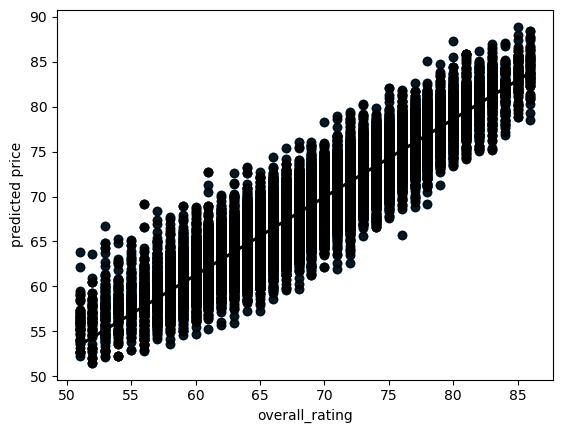

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
sb.regplot(x=y_test,y=y_pred,color="k")

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("mean_absolute_error :" ,mean_absolute_error(y_test,y_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_pred))

mean_absolute_error : 1.7875157387541467
mean_squared_error : 5.346048975182578


In [46]:
from sklearn.linear_model import LassoCV
lasso_model=LassoCV().fit(x_train,y_train)
print("Lasso regression train accuracy :",lasso_model.score(x_train,y_train))
print("Lasso regression test accuracy :",lasso_model.score(x_test,y_test))

Lasso regression train accuracy : 0.8648880707764446
Lasso regression test accuracy : 0.8619835537292581


In [47]:
from sklearn.linear_model import  RidgeCV
ridge_model=RidgeCV().fit(x_train,y_train)
print("Ridge regression train accuracy :",ridge_model.score(x_train,y_train))
print("Ridge regression test accuracy :",ridge_model.score(x_test,y_test))

Ridge regression train accuracy : 0.8649509303054768
Ridge regression test accuracy : 0.8620166347687035
